## **Install Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure

## **Data Reading**

In [2]:
df=pd.read_csv('EPL_Soccer_MLR_LR.csv')
df_=df.copy()

## **Viewing Data and Variables**

In [3]:
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


## **Data Dictionary**

* PlayerName : Player Name

* Club : Club of the player
  1. MUN:Manchester United F.C.
  2. CHE: Chelsea F.C.
  3. LIV: Liverpool F.C.

* DistanceCovered(InKms): Average Kms distance covered by the player in each game

* Goals: Average Goals per match

* MinutestoGoalRatio: Minutes 

* ShotsPerGame: Average shots taken per game

* AgentCharges: Agent Fees in h

* BMI: Body-Mass index

* Cost: Cost of each player in hundread thousand dollars

* PreviousClubCost: Previous club cost in hundread thousand dollars

* Height: Height of player in cm

* Weight: Weight of player in kg

* Score: Average score per match


## **Exploratory Data Analysis**
Exploratory Data Analysis, commonly known as EDA, is a technique to analyze the data with visuals. It involves using statistics and visual techniques to identify particular trends in data. 
 
It is used to understand data patterns, spot anomalies, check assumptions, etc. The main purpose of EDA is to help look into the data before making any hypothesis about it.


In [4]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In total there are 202 row and 13 column of data.

There is no missing values within the dataset.

There are 2 categorical ("PlayerName","Club") and 11 numerical variables.

In [5]:
df_["PlayerName"].unique().shape

(198,)

There are 198 unique players within this dataset.

Four of the players are repeated twice.

In [6]:
df_[df_.duplicated(subset='PlayerName', keep=False)].sort_values(by='PlayerName')

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
111,"Rice, Master. Arthur",CHE,4.81,6.2,45.2,15.3,107,22.52,42.7,77.00,192.0,83.0,7.19
184,"Rice, Master. Arthur",LIV,5.34,10.0,46.8,16.2,94,25.82,100.7,71.00,182.7,86.2,17.24
178,"Rice, Master. Eric",LIV,5.01,8.9,46.0,15.9,212,30.18,96.9,80.00,180.1,97.9,18.08
185,"Rice, Master. Eric",LIV,5.16,12.9,47.6,15.6,156,21.93,56.8,72.00,190.5,79.6,9.89
7,"Rice, Master. Eugene",MUN,4.42,5.7,39.9,13.2,44,20.62,97.9,48.33,173.8,62.3,22.43
186,"Rice, Master. Eugene",LIV,5.29,12.7,48.0,16.2,124,23.38,75.9,74.00,191.0,85.3,13.06
22,"Rogers, Mr. William John",MUN,4.46,9.5,41.5,14.5,92,22.96,83.0,56.05,174.0,69.5,19.35
191,"Rogers, Mr. William John",LIV,5.08,8.5,46.3,15.6,117,26.86,75.6,86.00,193.9,101.0,14.98


In [7]:
df_[df_["PlayerName"]=="Rice, Master. Eric"]

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
178,"Rice, Master. Eric",LIV,5.01,8.9,46.0,15.9,212,30.18,96.9,80.0,180.1,97.9,18.08
185,"Rice, Master. Eric",LIV,5.16,12.9,47.6,15.6,156,21.93,56.8,72.0,190.5,79.6,9.89


3 of the repeated players are mentioned with two different clubs.

"Rice, Master. Eric" is mentioned twice and with the same club but all his values is different, which can be caused by player naming error.

In [8]:
df_["Club"].value_counts()

Club
CHE    78
LIV    65
MUN    59
Name: count, dtype: int64

The dataset contains players of 3 clubs.

Chelsea has the highest number of players in this dataset.

In [9]:
cat_cols=[col for col in df_.columns if str(df_[col].dtypes) in ["object","category","bool"]]
num_cols=[col for col in df_.columns if col not in cat_cols]
cv = df_[num_cols].std() / df_[num_cols].mean()
df_describe = df_.describe().T
df_describe['Coefficient of Variance'] = cv
df_describe.sort_values(by='Coefficient of Variance', ascending=False)

,count,mean,std,min,25%,50%,75%,max,Coefficient of Variance
AgentCharges,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00,0.617892
Cost,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80,0.471812
Score,202.0,13.507426,6.189826,5.63,8.5450,11.650,18.080,35.52,0.458254
Goals,202.0,7.108663,1.800549,3.30,5.9000,6.850,8.275,14.30,0.253289
PreviousClubCost,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00,0.201471
Weight,202.0,75.008168,13.925574,37.80,66.5250,74.400,84.125,123.20,0.185654
BMI,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42,0.124758
DistanceCovered(InKms),202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72,0.097057
ShotsPerGame,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20,0.093534
MinutestoGoalRatio,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70,0.085005


mean: The average value of the attribute.

std: The standard deviation, which measures the amount of variation or dispersion of the values.

Coefficient of Variance: A measure of relative variability calculated as (std / mean).

* AgentCharges: This attribute has a high standard deviation and coefficient of variance, indicating significant variability in agent charges.

* Cost: The cost also shows considerable variability but less than agent charges.

* Score: Scores have a moderate level of variability.

* All the other attributes have relatively low variability, indicating consistency in their values.

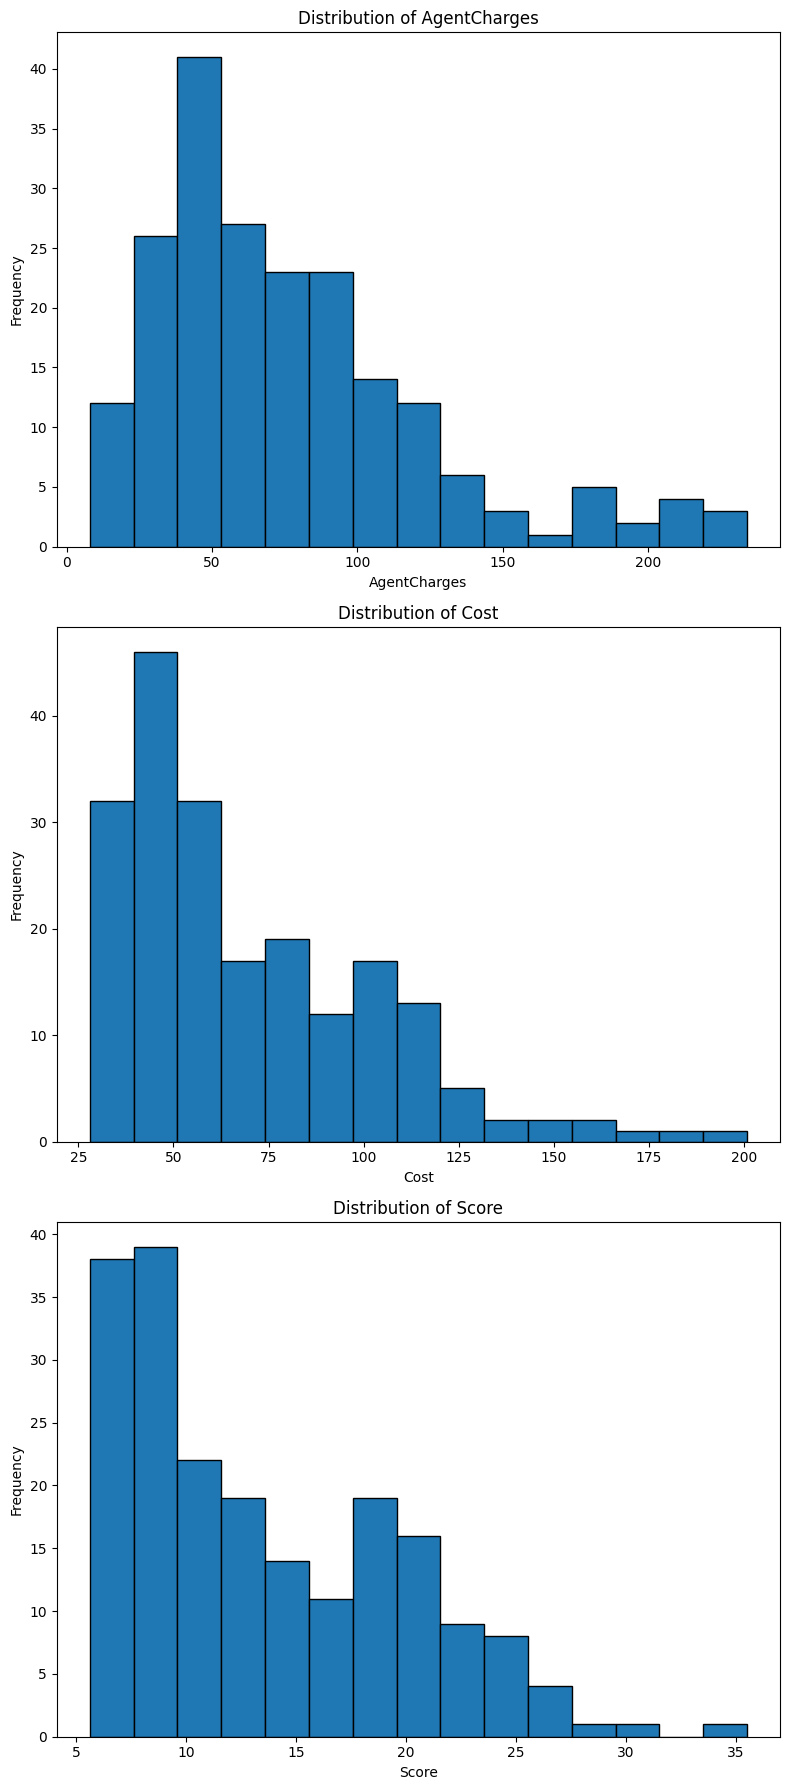

In [10]:
var_list =["AgentCharges","Cost","Score"]
fig, axs = plt.subplots(len(var_list), 1, figsize=(8, len(var_list)*6))

for i, var in enumerate(var_list):
    axs[i].hist(df[var], bins=15, edgecolor='black')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

## **Correlation**

Correlation coefficient is used to measure the strength of relationship between two variables. It indicates that as the value of one variable changes the other variable changes in a specific direction with some magnitude. There are various ways to find correlation between two variables, one of which is Pearson correlation coefficient.
It measures the linear relationship between two continuous variables.
 
 



In [11]:
df_[num_cols].corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


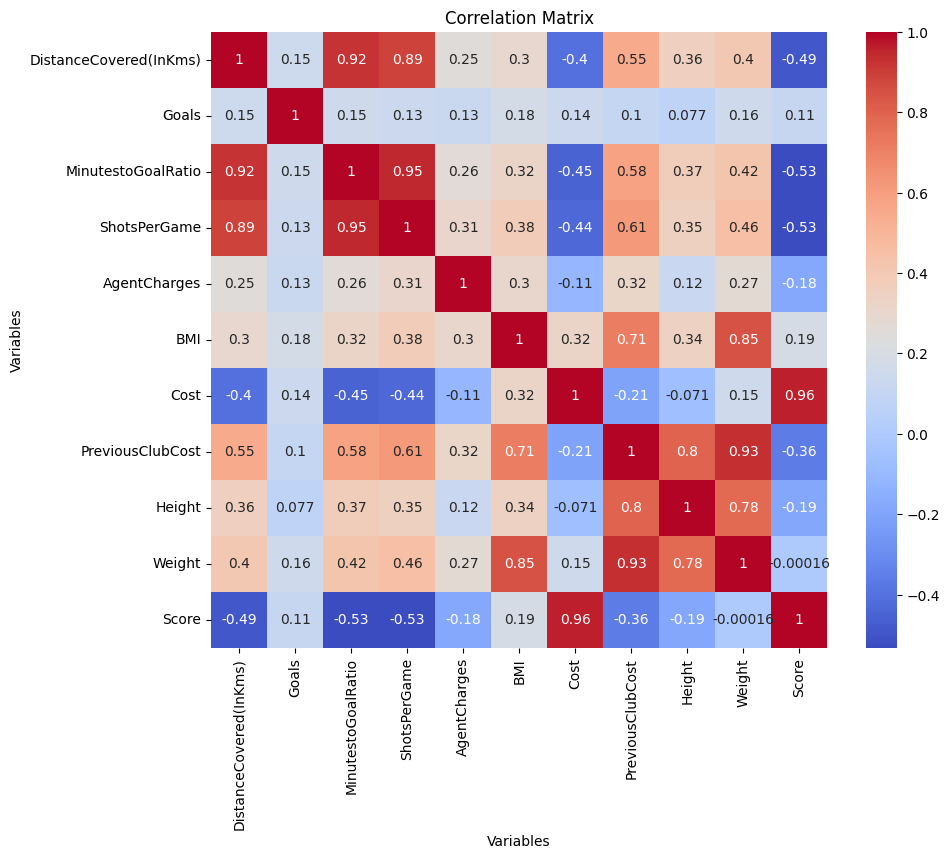

In [12]:
# Create correlation matrix
corr_matrix = df_[num_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Set title and labels
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the plot
plt.show()

Cost is the most significantly related feature to Score, with a very high positive correlation of 0.963. This suggests that increases in cost are strongly associated with increases in score.

MinutestoGoalRatio and ShotsPerGame are negatively correlated with Score, indicating that higher values in these metrics might be associated with lower scores.

There is a moderate negative correlation between Score and DistanceCovered, indicating that higher scores are associated with less distance covered.

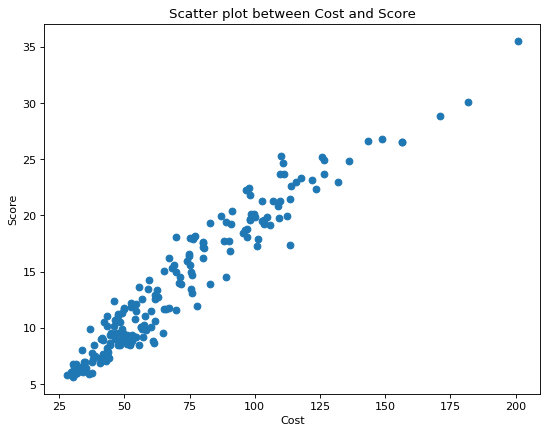

In [13]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df_['Cost'], df_['Score'])

# label

plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score");

The correlation between Cost and Score is easily visible here.

## **Train - Test Split**

In [14]:
# Assign x, y then do training testing split

x=df_['Cost']
y=df_['Score']

# Splitting with 75% training, 25% testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

## **Modeling the Data**

In [15]:
#statsmodels approach to regression
# fit the model
lr = sm.OLS(y_train, x_train).fit()

# Printing the parameters
lr.params
lr.summary()

#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           6.91e-88
Time:                        06:51:42   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.0

* $R^2$: the proportion of the variance in the dependent variable that is explained from the independent variable(s). $R^2$ is expressed between 0 and 1 for the level of variance explained.
* We got an $R^2$ of **0.93** which is pretty good.
* Adjusted $R^2$: a corrected goodness-of-fit statistic. It determines the proportion of variance in the target field explained by the input or inputs.

## **Prediction on Test Data**

const    0.947185
Cost     0.182083
dtype: float64


C:\Users\duqma\AppData\Local\Temp\ipykernel_7452\3203547142.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0=lr.params[0]
C:\Users\duqma\AppData\Local\Temp\ipykernel_7452\3203547142.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1=lr.params[1]


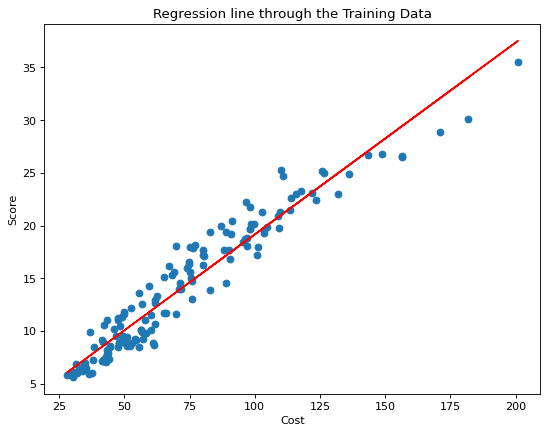

In [17]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train)

plt.plot(x_train, b0+ b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")

plt.show()

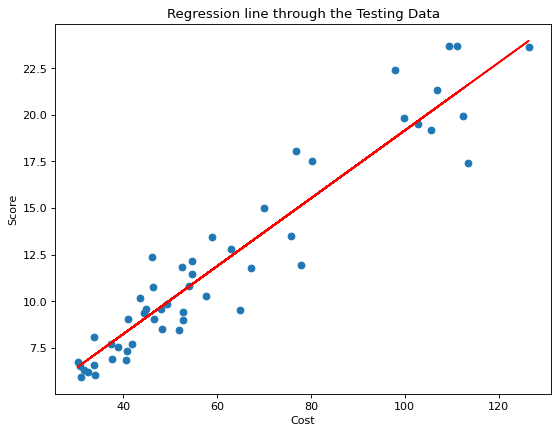

In [16]:
#Plot the fitted line on test data
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


# scatter plot on test data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Testing Data")

plt.show()

## **Diagnostics and Remedies**
This section is evaluating if the data follows the regression assumptions or not, whether Linear Regression is a good fit for the patterns in the data, and simply includes the things we do in order to assess how well the model performs. The following are the things we look for in the data to diagnose Linear Regression as an unfit model:
* **Non-Linearity**: First thing to look for is non-linearity, for example, your data might look linear for some time, and then it shows non-linearity and a parabola would fit better than a straight line.
 
* **Heteroscedasticity**: meaning non-constant variance, variance in one region may not be the same as in the second region.
 
* **Independence**: Errors are not independent and identically distributed.
 
* **Outliers**: Outliers can have a large impact on the model, for example, if there's a slow-growing regression line and there is an outlier up in the center, it will pull the regression line upwards than most of the data.
 
* **Missing Features**: Missing predictor variables, no need in a simple linear regression, which simply means losing on variables that can be useful but are not included.

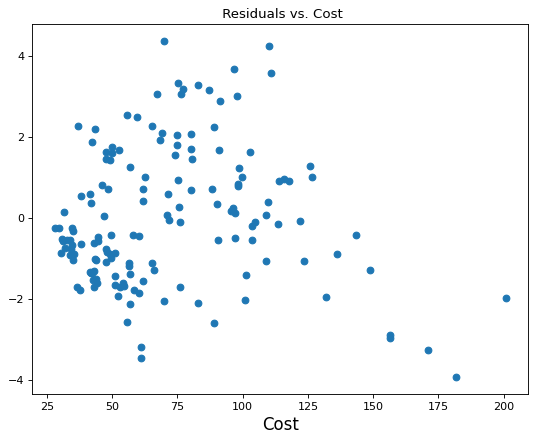

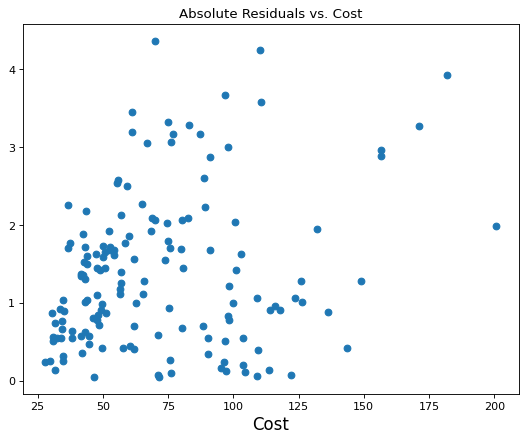

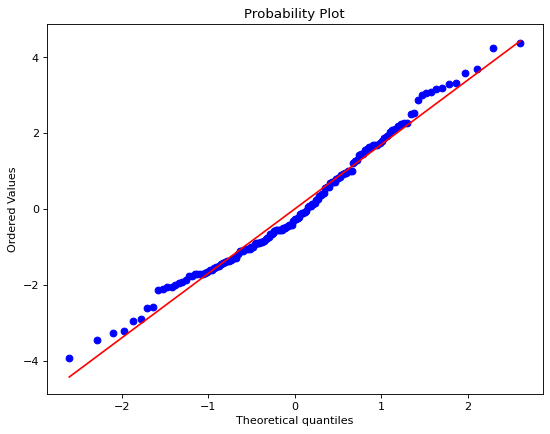

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

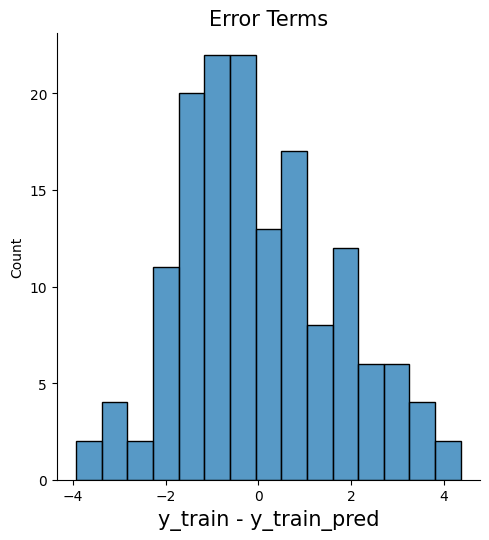

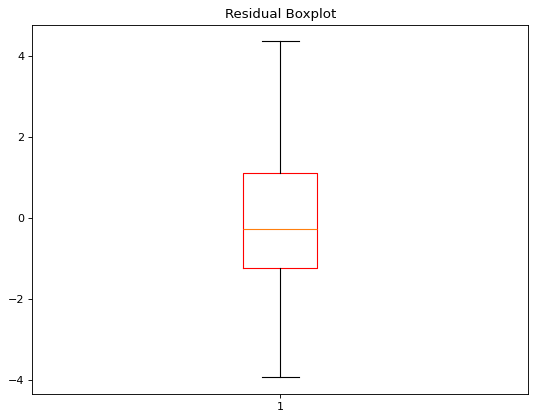

In [19]:
#DIAGNOSTICS

#CHECKLIST:
# NON-LINEARITY
# NON-CONSTANT VARIANCE
# DEVIATIONS FROM NORMALITY
# ERRORS NOT IID
# OUTLIERS
# MISSING PREDICTORS



#Build predictions on training data
predictions_y = lr.predict(x_train_with_intercept)

#Find residuals
r_i = (y_train - predictions_y)


#Residuals vs. predictor in training data
figure(figsize=(8, 6), dpi=80)
plt.title(' Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, r_i)
plt.show()




#Absolute residuals against predictor
abs_r_i = np.abs(y_train - predictions_y)
figure(figsize=(8, 6), dpi=80)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, abs_r_i)
plt.show()

#Normality plot
figure(figsize=(8, 6), dpi=80)
scipy.stats.probplot(r_i,plot=plt)

#Tails might be a little heavy, but overall no clear reason to reject normality expectations
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values

fig = plt.figure()
figure(figsize=(8, 6), dpi=80)
sns.displot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

#Boxplot for outliers
# plot
figure(figsize=(8, 6), dpi=80)
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');

* The residuals vs cost plot shows a good scatter of residuals and no pattern is observed up until 125 or 150 costs. We can say we have some heteroscedasticity in the higher costs. We'll see how we can tackle it. 
 
* The normality of the errors can be seen in the normal probability plot and the histogram. It is more or less normal or bell shaped.
 
* The residual boxplot shows no obvious outliers.

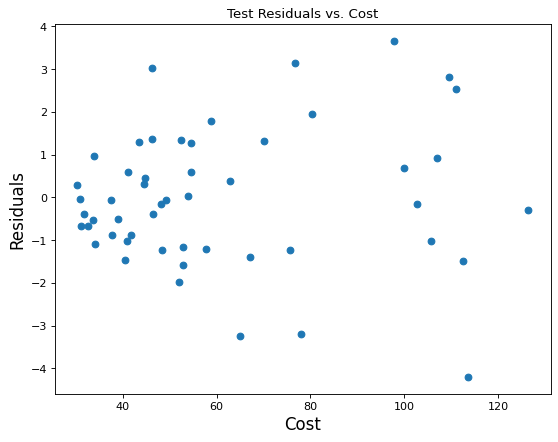

In [20]:
#Demo of how to deal with non-constant variance through transformations

test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor in test set
figure(figsize=(8, 6), dpi=80)
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.ylabel('Residuals',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Some evidence of non-constant variance

We can see the scatter of data points increases as we increase the cost. This is evidence of Heteroscedasticity.
 
We'll try different transformations such as square root, log, and box-cox to see if we can introduce linearity with these transformations.

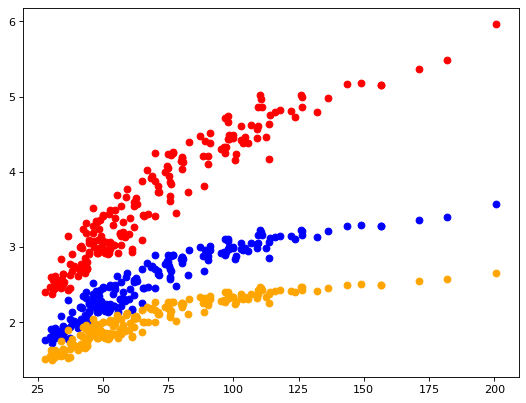

In [22]:
#Try sqrt
sqrt_y=np.sqrt(y)
figure(figsize=(8, 6), dpi=80)
plt.scatter(x, sqrt_y,color='red');

#Try ln
ln_y=np.log(y)
plt.scatter(x, ln_y,color='blue');

#Box Cox procedure on all cost
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(x, bc_y,color='orange');


We can observe that the square root transformation denoted by red dots gives the most linear scatter of data points. Let's try to run the linear regression model on the transformed variable and analyze the change in results.